**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Add ```/path/to/your/folder``` to load the images

In [34]:
cartoon = cv2.imread("/content/drive/MyDrive/CV/images/cartoon.bmp")
cartoon_y = cv2.imread("/content/drive/MyDrive/CV/images/cartoon_y.jpg")
girl = cv2.imread("/content/drive/MyDrive/CV/images/girl.png") #grayscale image
girl_y = cv2.imread("/content/drive/MyDrive/CV/images/girl_y.jpg")
fingerprint = cv2.imread("/content/drive/MyDrive/CV/images/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/drive/MyDrive/CV/images/fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

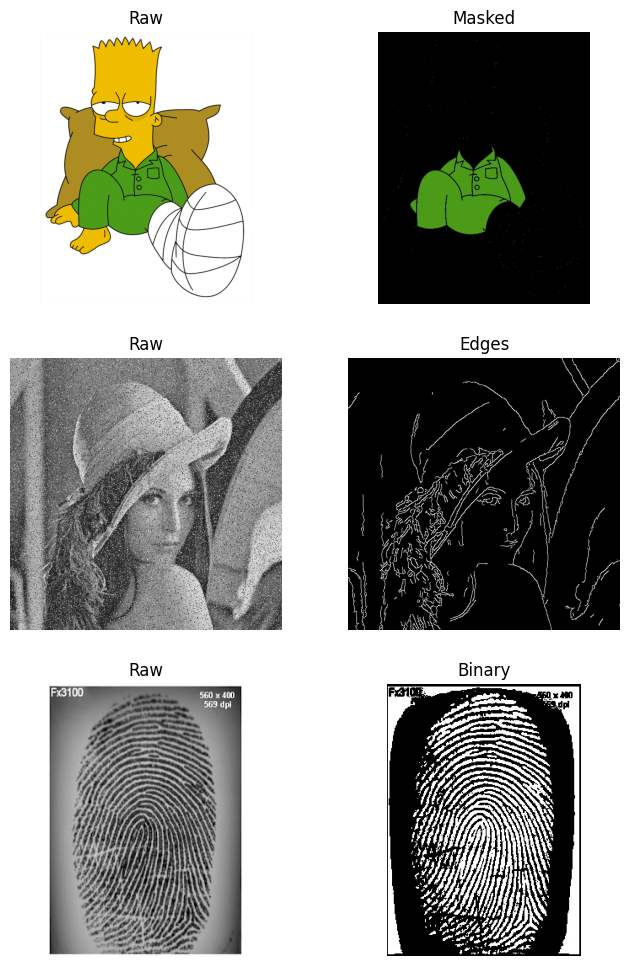

In [35]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [36]:
cartoon = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)
cartoon_y = cv2.cvtColor(cartoon_y, cv2.COLOR_BGR2RGB)

_, mask = cv2.threshold(girl, 1, 255, cv2.THRESH_BINARY)

mask_resized = cv2.resize(mask, (cartoon_y.shape[1], cartoon_y.shape[0]), interpolation=cv2.INTER_NEAREST)
cartoon_y_mentee = np.where(mask_resized == 255, cartoon_y, np.zeros_like(cartoon_y)) # Use the resized mask directly

cartoon_y_mentee = cv2.cvtColor(cartoon_y_mentee, cv2.COLOR_BGR2RGB)


### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

In [37]:
girl = cv2.imread("/content/drive/MyDrive/CV/images/girl.png", cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(girl, 400, 600)
girl_y_mentee = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [38]:
fingerprint = cv2.imread("/content/drive/MyDrive/CV/images/fingerprint.jpg")
gray_fingerprint = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)
_, binary_fingerprint = cv2.threshold(gray_fingerprint, 127, 255, cv2.THRESH_BINARY)
fingerprint_y_mentee = binary_fingerprint
fingerprint_y_mentee = np.where(fingerprint_y_mentee > 127, 255, 0).astype(np.uint8)

## Comparison

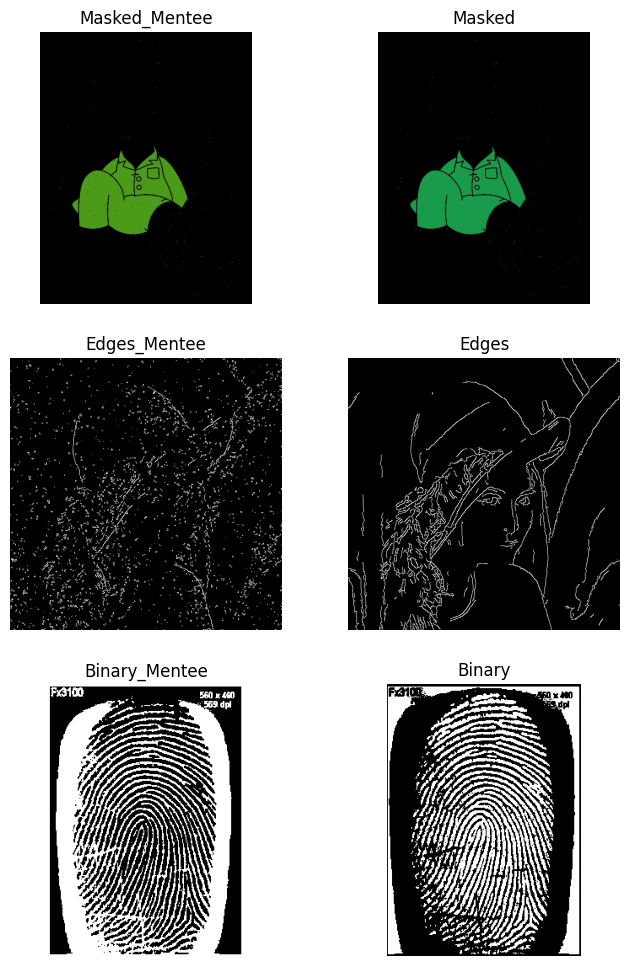

In [39]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()